# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [92]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [93]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [94]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | simpang empat
Processing Record 2 of Set 1 | kodiak
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | ballarat east
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | sola
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | talnakh
Processing Record 11 of Set 1 | st. john's
Processing Record 12 of Set 1 | isafjordur
Processing Record 13 of Set 1 | olonkinbyen
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | mejit
Processing Record 16 of Set 1 | conception bay south
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | badger
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | cannonvale
Processing Record 21 of Set 1 | iqaluit
Processing Record 22 of Set 1 | bilibino
Processing Record 23

In [95]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [96]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,simpang empat,4.9500,100.6333,23.99,97,100,1.07,MY,1722884892
1,kodiak,57.7900,-152.4072,12.73,100,100,6.69,US,1722885007
2,jamestown,42.0970,-79.2353,28.77,69,100,4.63,US,1722885008
3,ballarat east,-37.5592,143.8744,4.22,94,28,0.45,AU,1722885010
4,port-aux-francais,-49.3500,70.2167,1.01,72,12,5.54,TF,1722885011


In [97]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [99]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,simpang empat,4.9500,100.6333,23.99,97,100,1.07,MY,1722884892
1,kodiak,57.7900,-152.4072,12.73,100,100,6.69,US,1722885007
2,jamestown,42.0970,-79.2353,28.77,69,100,4.63,US,1722885008
3,ballarat east,-37.5592,143.8744,4.22,94,28,0.45,AU,1722885010
4,port-aux-francais,-49.3500,70.2167,1.01,72,12,5.54,TF,1722885011


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

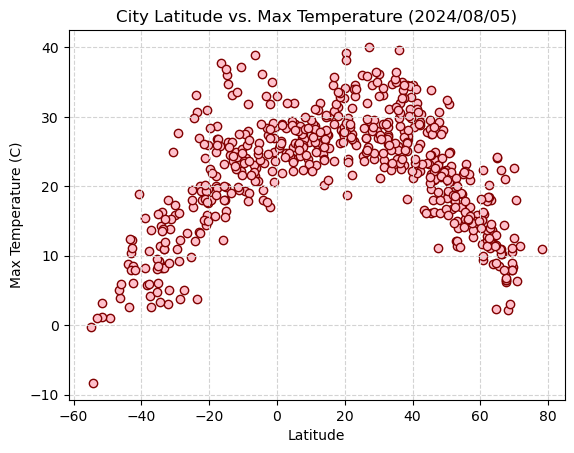

In [100]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], c="pink", linewidths=1, edgecolor="maroon", marker="o", label="Cities")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (2024/08/05)")
plt.grid (visible=True, which="major", axis="both", ls="--", c="lightgrey")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

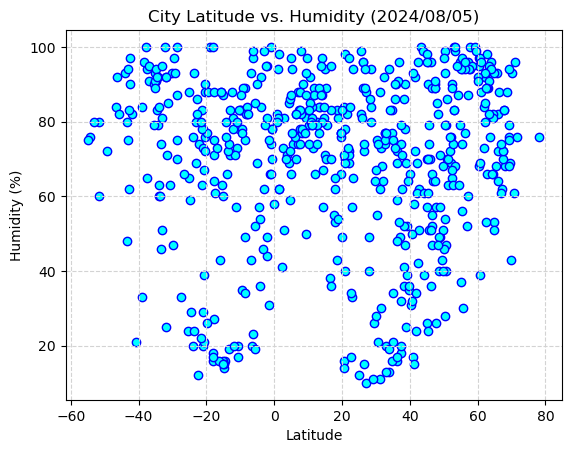

In [101]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], c="cyan", linewidths=1, edgecolor="blue", marker="o", label="Cities")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2024/08/05)")
plt.grid (visible=True, which="major", axis="both", ls="--", c="lightgrey")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

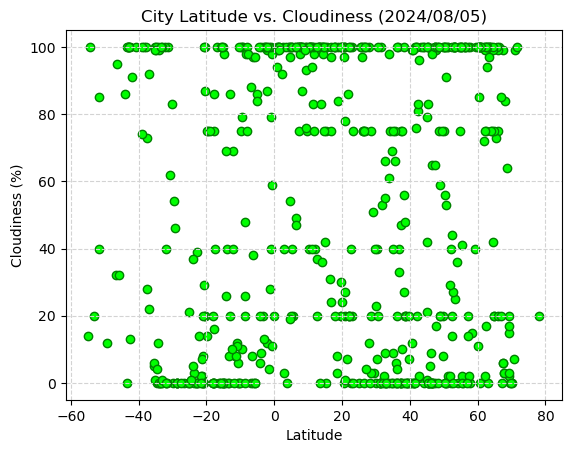

In [102]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], c="lime", linewidths=1, edgecolor="green", marker="o", label="Cities")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2024/08/05)")
plt.grid (visible=True, which="major", axis="both", ls="--", c="lightgrey")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

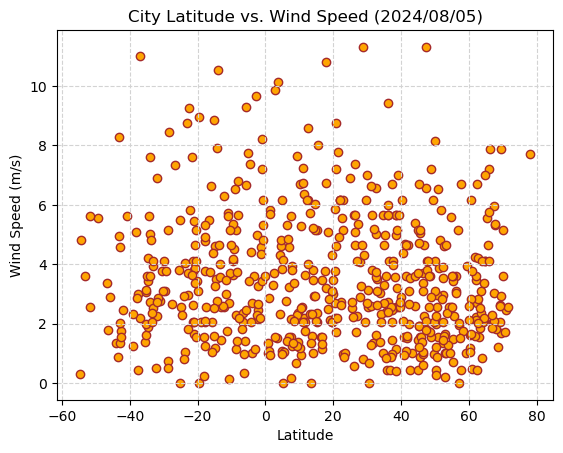

In [103]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], c="orange", linewidths=1, edgecolor="brown", marker="o", label="Cities")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2024/08/05)")
plt.grid (visible=True, which="major", axis="both", ls="--", c="lightgrey")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [104]:
# Define a function to create Linear Regression plots
def regression_plot(x_values, y_values, x_label, y_label, txt_location, hemisphere):
    #regression line parameters
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    #scatter plot parameters
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, txt_location, fontsize=15, color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{hemisphere} {x_label} vs {y_label}")

    print(f"The R-squared value is {rvalue**2:.5f}")


In [105]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,simpang empat,4.9500,100.6333,23.99,97,100,1.07,MY,1722884892
1,kodiak,57.7900,-152.4072,12.73,100,100,6.69,US,1722885007
2,jamestown,42.0970,-79.2353,28.77,69,100,4.63,US,1722885008
7,thompson,55.7435,-97.8558,23.15,30,0,2.27,CA,1722885014
9,talnakh,69.4865,88.3972,8.38,69,0,1.67,RU,1722885016


In [106]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,ballarat east,-37.5592,143.8744,4.22,94,28,0.45,AU,1722885010
4,port-aux-francais,-49.3500,70.2167,1.01,72,12,5.54,TF,1722885011
5,bredasdorp,-34.5322,20.0403,8.78,83,0,3.44,ZA,1722885012
6,sola,-13.8833,167.5500,24.49,66,40,10.53,VU,1722885013
8,waitangi,-43.9535,-176.5597,8.79,93,86,1.34,NZ,1722885015


###  Temperature vs. Latitude Linear Regression Plot

The R-squared value is 0.44784


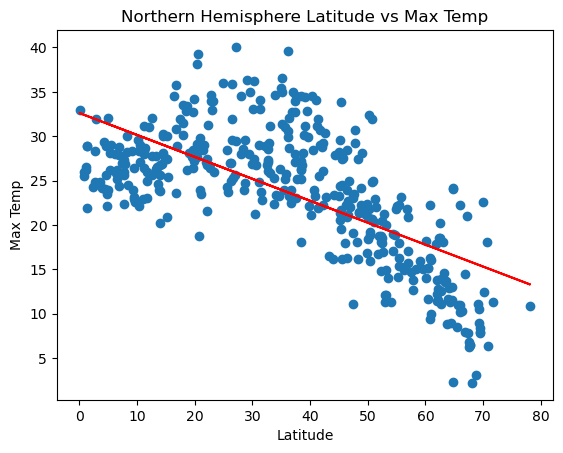

In [107]:
# Linear regression on Northern Hemisphere
hemisphere = "Northern Hemisphere"
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temp"
txt_location = (5, 276)
regression_plot(x_values, y_values, x_label, y_label, txt_location, hemisphere)


The R-squared value is 0.60533


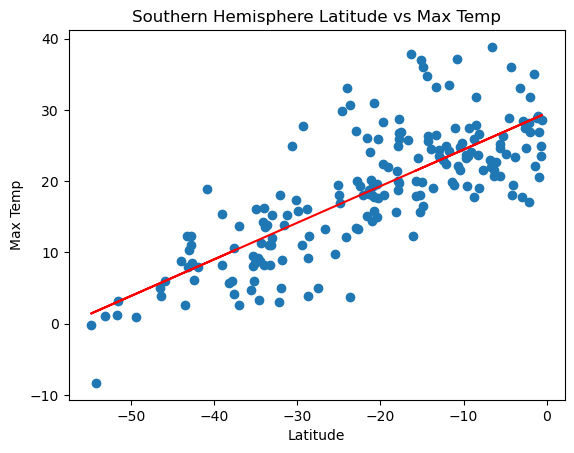

In [108]:
# Linear regression on Southern Hemisphere
hemisphere = "Southern Hemisphere"
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temp"
txt_location = (-25, 270)
regression_plot(x_values, y_values, x_label, y_label, txt_location, hemisphere)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The R-squared value is 0.00045


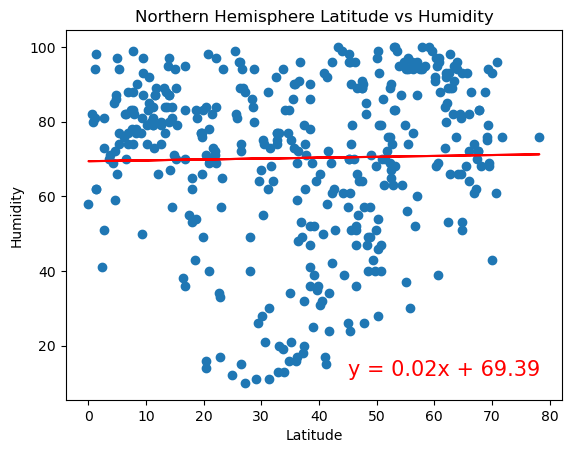

In [109]:
# Northern Hemisphere
hemisphere = "Northern Hemisphere"
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
txt_location = (45, 12)
regression_plot(x_values, y_values, x_label, y_label, txt_location, hemisphere)

The R-squared value is 0.03209


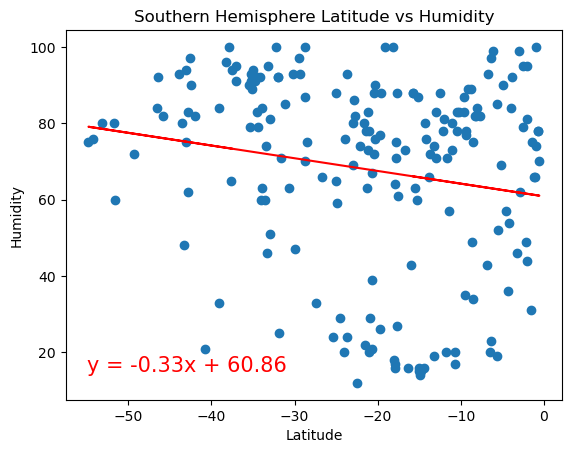

In [110]:
# Southern Hemisphere
hemisphere = "Southern Hemisphere"
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
txt_location = (-55, 15)
regression_plot(x_values, y_values, x_label, y_label, txt_location, hemisphere)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The R-squared value is 0.00093


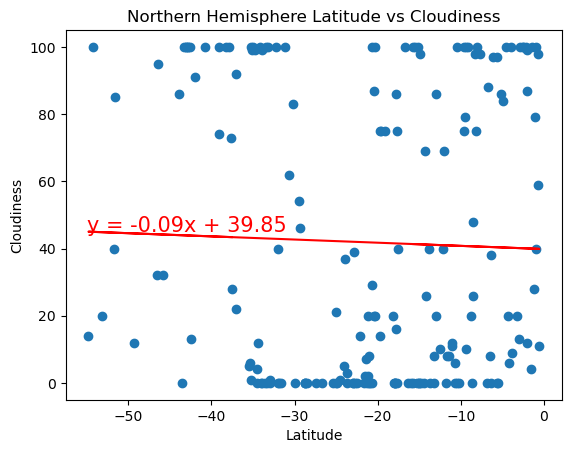

In [111]:
# Northern Hemisphere
hemisphere = "Northern Hemisphere"
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
txt_location = (-55, 45)
regression_plot(x_values, y_values, x_label, y_label, txt_location, hemisphere)

The R-squared value is 0.00093


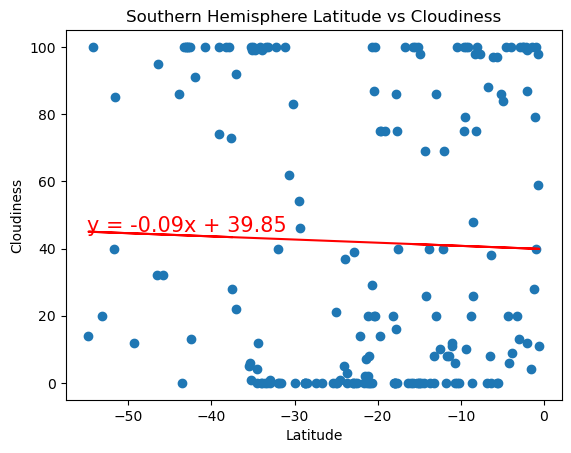

In [112]:
# Southern Hemisphere
hemisphere = "Southern Hemisphere"
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
txt_location = (-55, 45)
regression_plot(x_values, y_values, x_label, y_label, txt_location, hemisphere)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The R-squared value is 0.01284


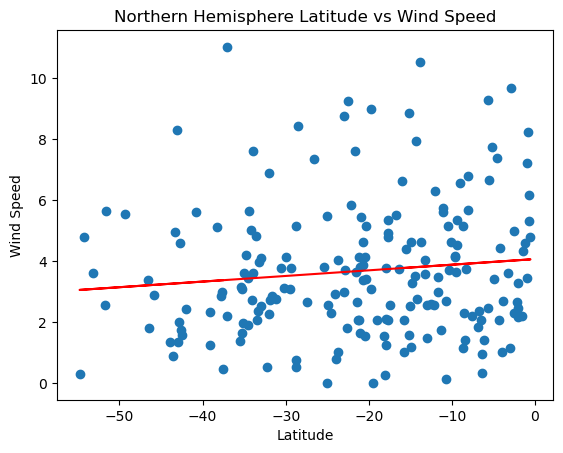

In [113]:
# Northern Hemisphere
hemisphere = "Northern Hemisphere"
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
txt_location = (-20, 12)
regression_plot(x_values, y_values, x_label, y_label, txt_location, hemisphere)

The R-squared value is 0.01284


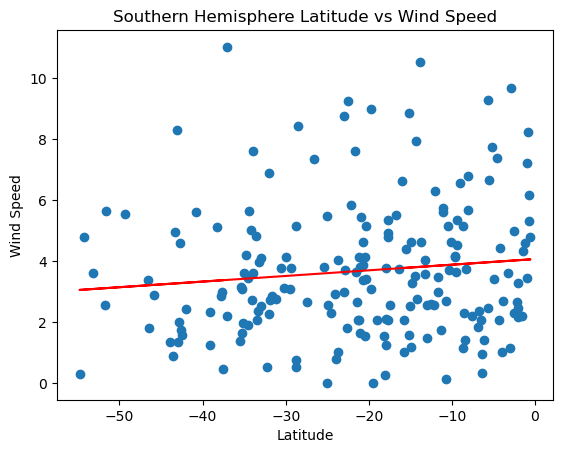

In [114]:
# Southern Hemisphere
hemisphere = "Southern Hemisphere"
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
txt_location = (-20, 12)
regression_plot(x_values, y_values, x_label, y_label, txt_location, hemisphere)

**Discussion about the linear relationship:** YOUR RESPONSE HERE